### Extraccionde de principales datos de la API fred

In [165]:
from getpass import getpass

api_key = getpass("Introduce tu API key de FRED: ")


Introduce tu API key de FRED: ··········


In [166]:
!pip install fredapi

Se ha decidido comenzar el análisis económico extrayendo las siguientes series de datos desde la API de FRED. Esta selección está orientada a obtener una visión general, amplia y equilibrada del estado de la economía de Estados Unidos, cubriendo aspectos como crecimiento, empleo, precios, expectativas y entorno financiero.

Selección inicial de indicadores económicos:

- GDP (Producto Interno Bruto): mide el crecimiento económico ajustado por inflación.
- Unemployment Rate (Tasa de desempleo): porcentaje de personas sin trabajo activamente buscando.
- CPI (Índice de Precios al Consumidor): mide la inflación en precios de consumo.
- PPI (Índice de Precios al Productor): indica cambios en precios a nivel de productores.
- S&P 500 (Índice bursátil): refleja la confianza y expectativas del mercado financiero.
- Federal Funds Rate (Tasa de fondos federales): tasa de interés de referencia para la economía.
- M2 Money Supply (Oferta monetaria M2): mide la cantidad de dinero líquido disponible.
- Consumer Confidence (Confianza del consumidor): muestra el sentimiento económico de los hogares.
- Inflation Expectations (Expectativas de inflación): estimación futura de inflación (a veces con datos faltantes).
- Commodity Prices (Precios de materias primas): impacto en inflación y costos productivos.
- Net Exports (Exportaciones netas): diferencia entre exportaciones e importaciones.


In [167]:
from fredapi import Fred
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holidays

In [168]:
# Inicializa el cliente
fred = Fred(api_key=api_key)

def buscar_series_por_palabra(palabra_clave, max_resultados=5):
    """
    Busca series en FRED que coincidan con palabra clave.
    """
    series_encontradas = fred.search(palabra_clave)
    print(f"Series encontradas para '{palabra_clave}':")
    print(series_encontradas.head(max_resultados))
    return series_encontradas.head(max_resultados)

def descargar_y_guardar_series(series_ids):
    """
    Descarga datos históricos para cada series_id y guarda CSV.
    """
    for series_id in series_ids:
      print(f"Descargando datos para {series_id} ...")
      datos = fred.get_series(series_id)
      df = pd.DataFrame(datos, columns=["value"])
      df.index.name = "date"
      csv_file = f"{series_id}_fred_data.csv"
      df.to_csv(csv_file)
      print(f"Guardado en {csv_file}\n")

# Lista de series a descargar con etiquetas descriptivas
series_info = [
    {"id": "GDPC1", "name": "GDP"},
    {"id": "UNRATE", "name": "Unemployment Rate"},
    {"id": "CPIAUCSL", "name": "CPI"},
    {"id": "PPIACO", "name": "PPI"},
    {"id": "SP500", "name": "S&P 500"},
    {"id": "FEDFUNDS", "name": "Federal Funds Rate"},
    {"id": "M2SL", "name": "M2 Money Supply"},
    {"id": "UMCSENT", "name": "Consumer Confidence"},
    {"id": "IR14260", "name": "Commodity Prices"},
    {"id": "NETEXP", "name": "Net Exports"}
]

# Lista para guardar los datasets individuales
datasets = []

# Descargar y guardar cada serie en la lista
for series in series_info:
  try:
      print(f"Descargando: {series['name']} ({series['id']})")
      datos = fred.get_series(series["id"])
      df = pd.DataFrame(datos, columns=["value"])
      df.index.name = "date"
      df = df.loc["1980-01-01":]  # Cortar desde 1980
      datasets.append({"name": series["name"], "id": series["id"], "data": df})
  except Exception as e:
      print(f"Error al descargar {series['name']}: {e}")

# Mostrar ejemplo de uso: imprimir los primeros datos del PIB
for dataset in datasets:
  print(f"\nPrimeras filas de {dataset['name']}:")
  print(dataset["data"].head())


Descargando: GDP (GDPC1)
Descargando: Unemployment Rate (UNRATE)
Descargando: CPI (CPIAUCSL)
Descargando: PPI (PPIACO)
Descargando: S&P 500 (SP500)
Descargando: Federal Funds Rate (FEDFUNDS)
Descargando: M2 Money Supply (M2SL)
Descargando: Consumer Confidence (UMCSENT)
Descargando: Commodity Prices (IR14260)
Descargando: Net Exports (NETEXP)

Primeras filas de GDP:
               value
date                
1980-01-01  7341.557
1980-04-01  7190.289
1980-07-01  7181.743
1980-10-01  7315.677
1981-01-01  7459.022

Primeras filas de Unemployment Rate:
            value
date             
1980-01-01    6.3
1980-02-01    6.3
1980-03-01    6.3
1980-04-01    6.9
1980-05-01    7.5

Primeras filas de CPI:
            value
date             
1980-01-01   78.0
1980-02-01   79.0
1980-03-01   80.1
1980-04-01   80.9
1980-05-01   81.7

Primeras filas de PPI:
            value
date             
1980-01-01   85.2
1980-02-01   86.9
1980-03-01   87.5
1980-04-01   87.8
1980-05-01   88.3

Primeras filas de S&

### Cobertura temporal y calidad de los datos

In [169]:
def dataset_summary(datasets):
  for ds in datasets:
    nombre = ds["name"]
    df = ds["data"]
    print(f"{nombre}: {df.index.min().date()} → {df.index.max().date()}, {df.shape[0]} registros, NaNs: {df['value'].isna().sum()}")

dataset_summary(datasets)

GDP: 1980-01-01 → 2025-01-01, 181 registros, NaNs: 0
Unemployment Rate: 1980-01-01 → 2025-05-01, 545 registros, NaNs: 0
CPI: 1980-01-01 → 2025-05-01, 545 registros, NaNs: 0
PPI: 1980-01-01 → 2025-05-01, 545 registros, NaNs: 0
S&P 500: 2015-06-22 → 2025-06-20, 2610 registros, NaNs: 95
Federal Funds Rate: 1980-01-01 → 2025-05-01, 545 registros, NaNs: 0
M2 Money Supply: 1980-01-01 → 2025-04-01, 544 registros, NaNs: 0
Consumer Confidence: 1980-01-01 → 2025-04-01, 544 registros, NaNs: 0
Commodity Prices: 2008-12-01 → 2025-05-01, 198 registros, NaNs: 0
Net Exports: 1980-01-01 → 2025-01-01, 181 registros, NaNs: 0


Los valores NaN del Sp500 puede que sean de dias sin cotizacion siendo festivos. De todas formas se imprimirá eso valores donde hay NaN. Para comparar y automatizar la tarea su usará una linreraria que contiene los dias festivos de EEUU ademas de mas paises "Holidays"

In [170]:
for ds in datasets:
  if ds["name"] == "S&P 500":
      sp500_df = ds["data"]
      break

# Mostrar filas con valores nulos en el dataframe del S&P 500
print("Filas con valores nulos en S&P 500:")
# Crear el objeto de festivos para EE.UU. con los años del dataset
print(sp500_df[sp500_df.isna().any(axis=1)])

Filas con valores nulos en S&P 500:
            value
date             
2015-07-03    NaN
2015-09-07    NaN
2015-11-26    NaN
2015-12-25    NaN
2016-01-01    NaN
...           ...
2025-01-20    NaN
2025-02-17    NaN
2025-04-18    NaN
2025-05-26    NaN
2025-06-19    NaN

[95 rows x 1 columns]


In [171]:
# Crear el objeto de festivos para EE.UU. con los años del dataset
years = sp500_df.index.year.unique().tolist()
us_holidays = holidays.US(years=years)

# Filtrar filas con valores nulos
nulls = sp500_df[sp500_df.isna().any(axis=1)].copy()

# Añadir columna con fecha completa en formato 'YYYY-MM-DD'
nulls["Fecha_completa"] = nulls.index.strftime("%Y-%m-%d")

# Añadir columna que indica si la fecha es festiva
nulls["Es_festivo"] = nulls.index.to_series().apply(lambda x: x in us_holidays)

# Mostrar resultados con fecha completa
print(nulls[["Fecha_completa", "value", "Es_festivo"]])
print()

# Filtrar filas donde value es NaN pero Es_festivo es False
nans_not_holidays = nulls[(nulls["value"].isna()) & (nulls["Es_festivo"] == False)]

print("Fechas con value NaN pero no festivos:")
print(nans_not_holidays[["Fecha_completa", "value", "Es_festivo"]])
print("Hay:", nans_not_holidays.shape[0], "que no son festivos y son nulos")

           Fecha_completa  value  Es_festivo
date                                        
2015-07-03     2015-07-03    NaN        True
2015-09-07     2015-09-07    NaN        True
2015-11-26     2015-11-26    NaN        True
2015-12-25     2015-12-25    NaN        True
2016-01-01     2016-01-01    NaN        True
...                   ...    ...         ...
2025-01-20     2025-01-20    NaN        True
2025-02-17     2025-02-17    NaN        True
2025-04-18     2025-04-18    NaN       False
2025-05-26     2025-05-26    NaN        True
2025-06-19     2025-06-19    NaN        True

[95 rows x 3 columns]

Fechas con value NaN pero no festivos:
           Fecha_completa  value  Es_festivo
date                                        
2016-03-25     2016-03-25    NaN       False
2017-04-14     2017-04-14    NaN       False
2018-03-30     2018-03-30    NaN       False
2018-12-05     2018-12-05    NaN       False
2019-04-19     2019-04-19    NaN       False
2020-04-10     2020-04-10    NaN     

Al revisar los datos del S&P 500, se encontraron valores faltantes (NaN) en fechas que coinciden con estos feriados oficiales, lo cual es esperable porque el mercado no opera esos días. Por lo tanto, es razonable eliminar esos registros con valores NaN que correspondan a feriados para limpiar el dataset.

Sin embargo, también se detectaron valores NaN en días que no están reconocidos como feriados oficiales en la librería holidays. Estos días corresponden a situaciones especiales, como el Viernes Santo, que aunque no es un feriado federal oficial, es un día no laborable para muchos agentes financieros. Dado que no están oficialmente catalogados como feriados, no se eliminarán automáticamente para evitar perder información relevante o distorsionar el análisis.

Ademas hay dos dias en concreto que son festivos no oficiales: 2018-12-05: Día Nacional de Duelo por el presidente George H. W. Bush y  2025-01-09: Día Nacional de Duelo por el presidente Jimmy Carter

Por lo que se van a eliminar esos valores de NaN despues de analizarlos

In [172]:
# Eliminar todos los registros donde 'value' es NaN
sp500_df_clean = sp500_df[sp500_df["value"].notna()]

print(f"Antes: {sp500_df.shape[0]} filas")
print(f"Después de eliminar NaN en 'value': {sp500_df_clean.shape[0]} filas")

Antes: 2610 filas
Después de eliminar NaN en 'value': 2515 filas


Ahora modificamos el dataset dond eestan todos los datos para actualizar la limpieza de los dias festivos donde el sp500 no cotizó

In [186]:
dataset_summary(datasets)

GDP: 1980-04-01 → 2025-01-01, 180 registros, NaNs: 0
Unemployment Rate: 1980-02-01 → 2025-05-01, 544 registros, NaNs: 0
CPI: 1980-02-01 → 2025-05-01, 544 registros, NaNs: 0
PPI: 1980-02-01 → 2025-05-01, 544 registros, NaNs: 0
S&P 500: 2015-06-23 → 2025-06-18, 2419 registros, NaNs: 0
Federal Funds Rate: 1980-01-01 → 2025-05-01, 545 registros, NaNs: 0
M2 Money Supply: 1980-02-01 → 2025-04-01, 543 registros, NaNs: 0
Consumer Confidence: 1980-02-01 → 2025-04-01, 543 registros, NaNs: 0
Commodity Prices: 2009-01-01 → 2025-05-01, 197 registros, NaNs: 0
Net Exports: 1980-04-01 → 2025-01-01, 180 registros, NaNs: 0


Para analizar la dinámica de las variables económicas y financieras, calcular la variación porcentual es muy útil, ya que nos muestra la tasa de cambio relativa en el tiempo y ayuda a comparar magnitudes distintas.

Sin embargo, no todas las variables se benefician de este cálculo:

Variables como S&P 500, GDP, CPI, PPI, M2 Money Supply representan niveles o valores acumulados, por lo que calcular su variación porcentual tiene sentido para observar cómo cambian con el tiempo.

En cambio, variables como Unemployment Rate, Federal Funds Rate, Consumer Confidence, Inflation Expectations, Net Exports ya son tasas, índices o valores que representan cambios relativos, por lo que calcular la variación porcentual puede ser redundante o poco informativo. En estos casos, es mejor evaluar individualmente si conviene aplicar el cálculo o no.

In [174]:
variables_para_variacion = ["S&P 500", "GDP", "CPI", "PPI", "M2 Money Supply"]

for ds in datasets:
  if ds["name"] in variables_para_variacion:
      df = ds["data"].copy()
      df["pct_change"] = df["value"].pct_change() * 100
      ds["data"] = df


/tmp/ipython-input-174-575773339.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["pct_change"] = df["value"].pct_change() * 100


- **GDP (PIB)**: Disponible trimestralmente desde 1980 hasta inicios de 2025, con 181 registros y sin valores faltantes. Buena cobertura a largo plazo, adecuada para análisis de ciclos económicos.

- **Unemployment Rate, CPI, PPI, Federal Funds Rate**: Estas series tienen datos mensuales completos desde 1980 hasta mediados de 2025, con 545 registros y sin valores nulos. Son ideales para análisis macroeconómicos con resolución mensual.

- **S&P 500**: Disponible desde junio de 2015 hasta junio de 2025, con 2610 registros (frecuencia diaria). Aunque la cobertura temporal es más reciente, permite observar con mucho detalle la evolución del mercado. Tiene 95 valores faltantes, posiblemente por días sin cotización (fines de semana o festivos).

- **M2 Money Supply y Consumer Confidence**: Datos mensuales desde 1980 hasta abril de 2025 (~544 registros). Sin valores faltantes. Buena serie para observar efectos de la política monetaria y percepción del consumidor a largo plazo.

- **Commodity Prices**: Serie más limitada, disponible solo desde diciembre de 2008. Tiene 198 registros mensuales. Aunque útil, su menor longitud puede ser una limitación para análisis históricos extensos.

- **Net Exports**: Datos trimestrales desde 1980 hasta principios de 2025, igual que el PIB. 181 registros y sin nulos. Útil para estudiar la balanza comercial en el contexto del crecimiento económico.

### Tendencias generales gráficas

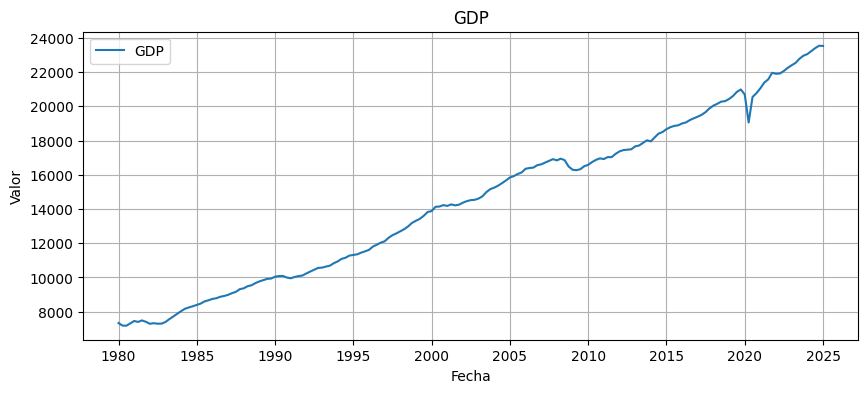

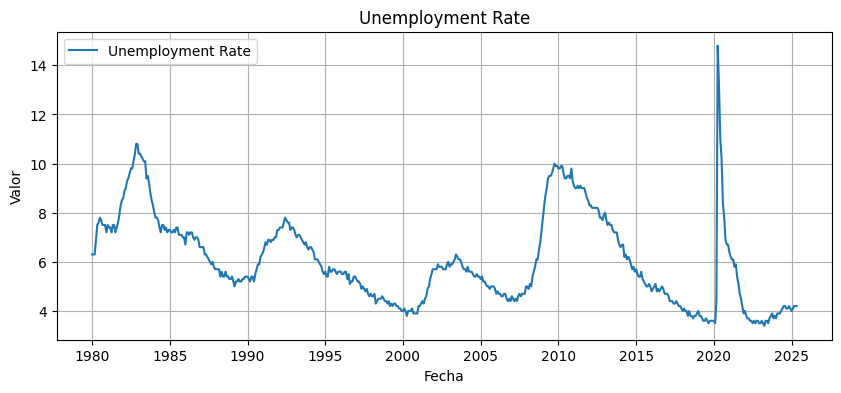

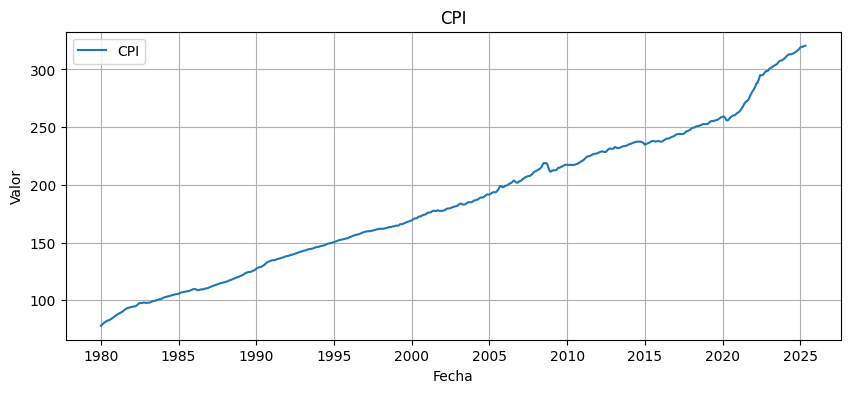

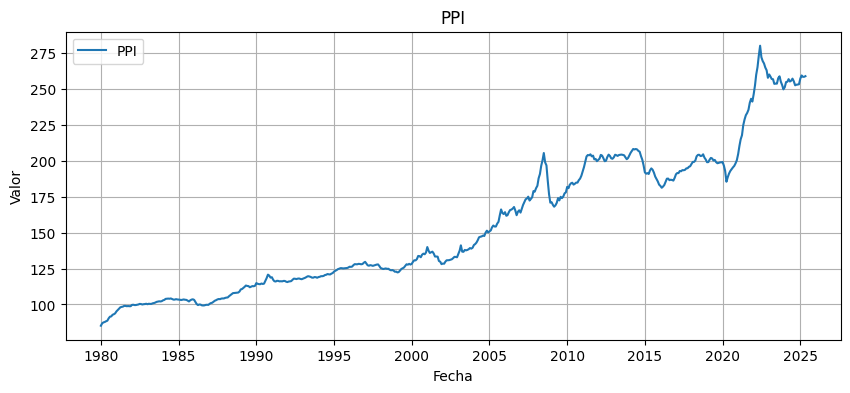

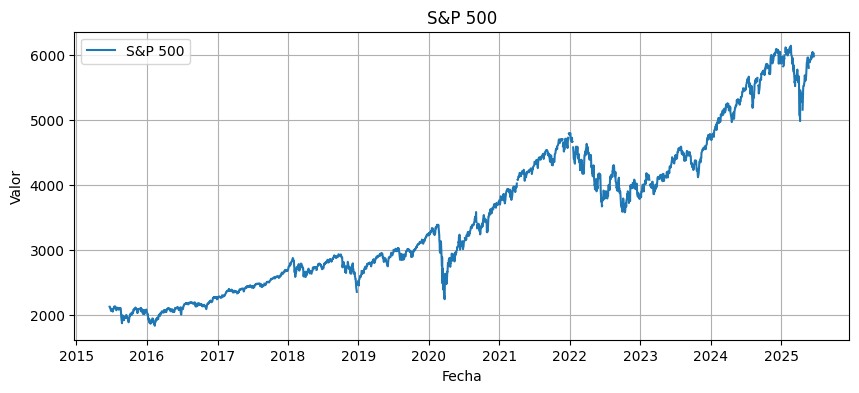

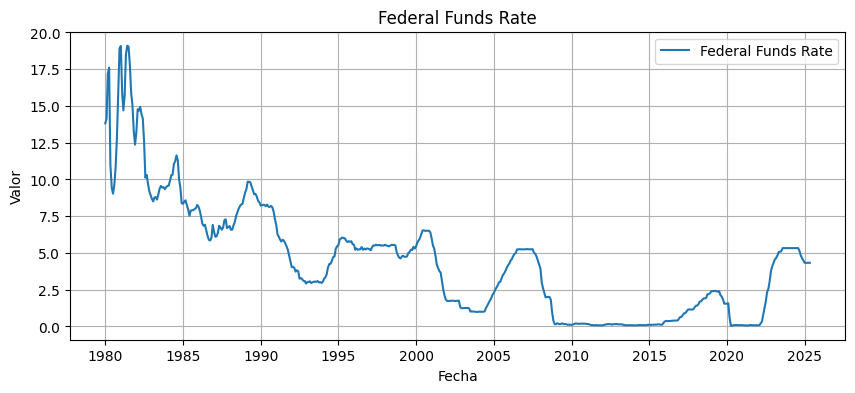

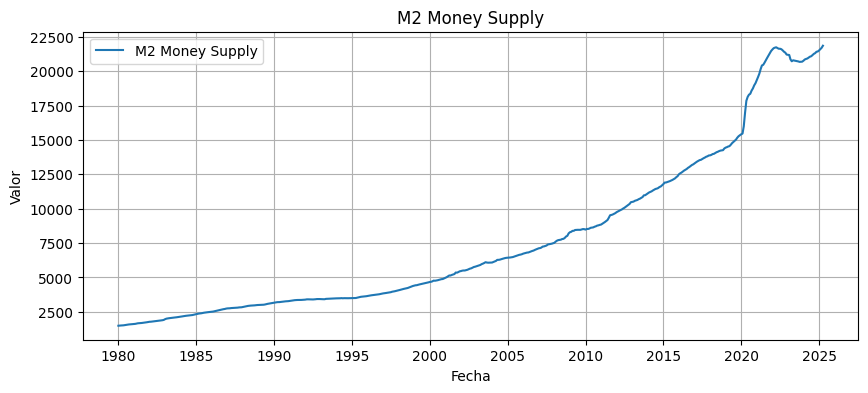

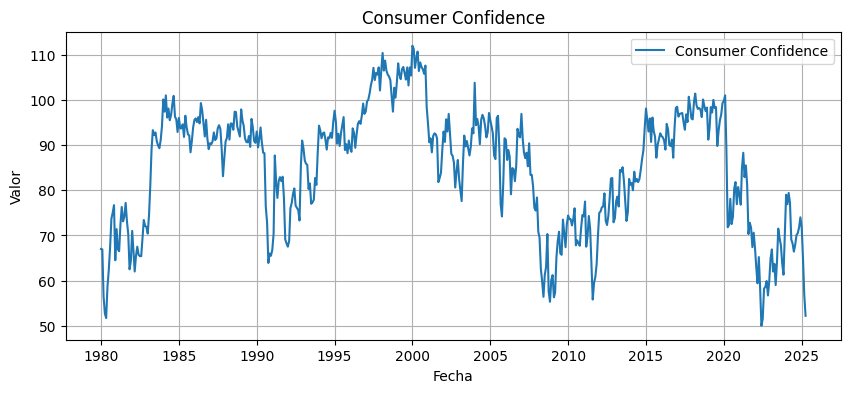

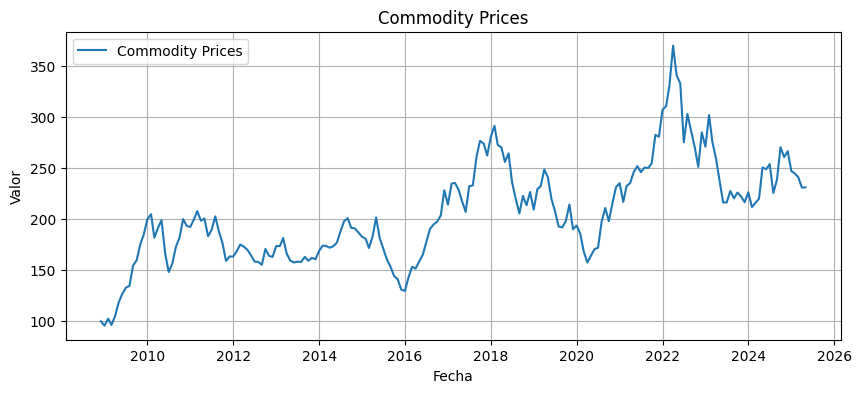

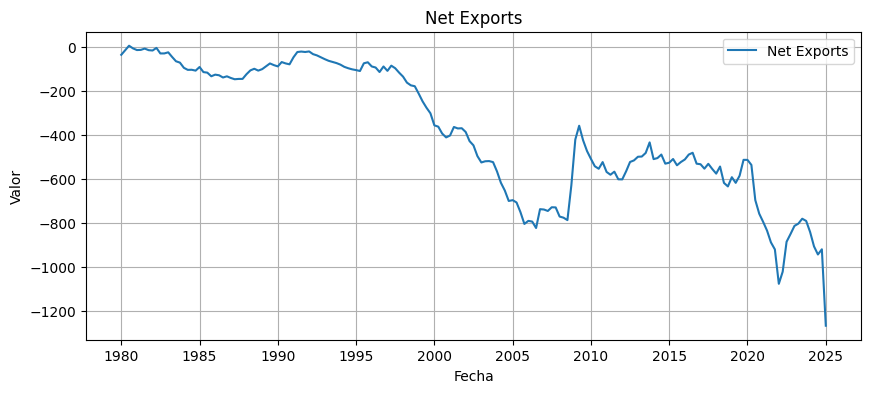

In [175]:
for ds in datasets:
    plt.figure(figsize=(10, 4))
    plt.plot(ds["data"].index, ds["data"]["value"], label=ds["name"])
    plt.title(ds["name"])
    plt.xlabel("Fecha")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    plt.show()

- **GDP (PIB real)**: Muestra una tendencia creciente a largo plazo, reflejando el crecimiento económico sostenido de Estados Unidos desde 1980, con caídas visibles durante períodos de recesión (como 2008 o 2020).

- **Unemployment Rate (Tasa de desempleo)**: Presenta movimientos cíclicos con picos durante crisis económicas. Tiende a disminuir tras periodos de crecimiento económico. La tendencia general ha sido moderadamente descendente en el largo plazo.

- **CPI (Índice de Precios al Consumidor)**: Su tendencia ha sido creciente, indicando inflación sostenida a lo largo del tiempo. La pendiente varía en intensidad según los periodos.

- **PPI (Índice de Precios al Productor)**: Similar al CPI, con tendencia creciente. En algunos periodos se observan picos más pronunciados, lo que sugiere sensibilidad a los costos de producción.

- **S&P 500**: Tendencia claramente ascendente, con caídas marcadas durante crisis (como 2000, 2008 y 2020). Refleja el rendimiento del mercado accionario a lo largo del tiempo.

- **Federal Funds Rate**: Alta variabilidad. Se observa una tendencia descendente desde los años 80, aunque con incrementos puntuales en contextos de control inflacionario.

- **M2 Money Supply (Oferta monetaria M2)**: Tendencia claramente ascendente, especialmente desde 2008 y más drásticamente a partir de 2020, reflejando políticas monetarias expansivas.

- **Consumer Confidence (Confianza del consumidor)**: Serie volátil y sensible a eventos económicos. No muestra una tendencia clara a largo plazo, pero sí ciclos definidos.

- **Inflation Expectations**: Su comportamiento es relativamente estable con ligeras subidas en contextos inflacionarios, aunque no sigue una tendencia sostenida.

- **Commodity Prices (Precios de materias primas)**: Muy volátil, con subidas y bajadas pronunciadas. No muestra una tendencia clara sostenida, pero se aprecian ciclos.

- **Net Exports (Exportaciones netas)**: Tendencia claramente descendente, indicando que Estados Unidos ha aumentado progresivamente su déficit comercial a

### Analisis correlaciones

In [176]:
for ds in datasets:
    df = ds["data"]
    df["pct_change"] = df["value"].pct_change(fill_method=None) * 100

# Convertir cada serie a un DataFrame con nombre como columna
merged = pd.concat([ds["data"]["value"].rename(ds["name"]) for ds in datasets], axis=1)

# Mostrar correlaciones
correlaciones = merged.corr()
print(correlaciones)

                          GDP  Unemployment Rate       CPI       PPI  \
GDP                  1.000000          -0.395017  0.993769  0.957540   
Unemployment Rate   -0.395017           1.000000 -0.388759 -0.315422   
CPI                  0.993769          -0.388759  1.000000  0.974143   
PPI                  0.957540          -0.315422  0.974143  1.000000   
S&P 500              0.970473          -0.207694  0.939495  0.878899   
Federal Funds Rate  -0.729872           0.109518 -0.717719 -0.641418   
M2 Money Supply      0.932675          -0.349453  0.943442  0.949551   
Consumer Confidence -0.169593          -0.370404 -0.242105 -0.370823   
Commodity Prices     0.731453          -0.611670  0.685468  0.715090   
Net Exports         -0.907861           0.351782 -0.890778 -0.882457   

                      S&P 500  Federal Funds Rate  M2 Money Supply  \
GDP                  0.970473           -0.729872         0.932675   
Unemployment Rate   -0.207694            0.109518        -0.349453 

- **GDP y CPI (0.993)**: Existe una correlación positiva muy fuerte. Esto indica que, cuando la economía crece (PIB aumenta), también tienden a subir los precios al consumidor (inflación). Es una relación lógica en contextos de expansión económica.

- **GDP y Unemployment Rate (−0.39)**: Correlación negativa moderada. A medida que el PIB aumenta, la tasa de desempleo tiende a disminuir. Esto refleja que una economía más activa suele generar más empleo.

- **S&P 500 y GDP (0.97)**: Correlación positiva muy alta. Sugiere que el mercado bursátil (representado por el índice S&P 500) suele desempeñarse bien cuando la economía general está en crecimiento.

- **Net Exports y GDP (−0.91)**: Correlación negativa muy fuerte. Implica que cuando el PIB aumenta, las exportaciones netas tienden a caer. Una posible explicación es que, al aumentar la actividad económica interna, también aumentan las importaciones más rápido que las exportaciones.


In [177]:
from statsmodels.tsa.stattools import adfuller

def test_adf(series, name, alpha=0.05):
    """Aplica el test ADF y muestra el resultado."""
    result = adfuller(series.dropna())
    p_value = result[1]
    print(f"\n Serie: {name}")
    print(f" - ADF Statistic: {result[0]:.4f}")
    print(f" - p-value: {p_value:.4f}")
    if p_value < alpha:
        print(" La serie **es estacionaria** (p < 0.05)")
        return True
    else:
        print("La serie **NO es estacionaria** (p >= 0.05)")
        return False

# Recorremos todos los datasets y transformamos si es necesario
for ds in datasets:
    df = ds["data"]
    name = ds["name"]

    if "value" not in df.columns:
        continue  # Saltamos si no tiene columna "value"

    is_stationary = test_adf(df["value"], name)

    if not is_stationary:
        print(" - Aplicando 1ª diferencia y guardando en el dataset...")

        # Guardamos copia original
        df["value_original"] = df["value"]

        # Aplicamos la primera diferencia
        df["value"] = df["value"].diff()

        # Eliminamos los NaN creados por la diferencia
        df.dropna(inplace=True)

        # Actualizamos el dataset
        ds["data"] = df

        # Volvemos a testear
        test_adf(df["value"], name + " (diferenciada)")



 Serie: GDP
 - ADF Statistic: 1.1793
 - p-value: 0.9958
La serie **NO es estacionaria** (p >= 0.05)
 - Aplicando 1ª diferencia y guardando en el dataset...

 Serie: GDP (diferenciada)
 - ADF Statistic: -15.6624
 - p-value: 0.0000
 La serie **es estacionaria** (p < 0.05)

 Serie: Unemployment Rate
 - ADF Statistic: -2.7186
 - p-value: 0.0709
La serie **NO es estacionaria** (p >= 0.05)
 - Aplicando 1ª diferencia y guardando en el dataset...

 Serie: Unemployment Rate (diferenciada)
 - ADF Statistic: -13.4618
 - p-value: 0.0000
 La serie **es estacionaria** (p < 0.05)

 Serie: CPI
 - ADF Statistic: 1.5216
 - p-value: 0.9976
La serie **NO es estacionaria** (p >= 0.05)
 - Aplicando 1ª diferencia y guardando en el dataset...

 Serie: CPI (diferenciada)
 - ADF Statistic: -3.7047
 - p-value: 0.0040
 La serie **es estacionaria** (p < 0.05)

 Serie: PPI
 - ADF Statistic: 0.5022
 - p-value: 0.9849
La serie **NO es estacionaria** (p >= 0.05)
 - Aplicando 1ª diferencia y guardando en el dataset...

In [178]:
def show_datasets(datasets=datasets):
  # Mostrar cada dataset en el dict
  for ds in datasets:
    name = ds.get("name", "Sin nombre")
    data = ds.get("data")

    print(f"\n DATASET: {name}")
    print("-" * (10 + len(name)))

    if isinstance(data, pd.DataFrame):
        print(f"-> Columnas: {list(data.columns)}")
        print(f"-> Dimensiones: {data.shape[0]} filas x {data.shape[1]} columnas\n")
        print(data.head(10).to_string(index=True))
    else:
        print("⚠️ No es un DataFrame válido o está vacío.")

show_datasets()


 DATASET: GDP
-------------
-> Columnas: ['value', 'pct_change', 'value_original']
-> Dimensiones: 180 filas x 3 columnas

              value  pct_change  value_original
date                                           
1980-04-01 -151.268   -2.060435        7190.289
1980-07-01   -8.546   -0.118855        7181.743
1980-10-01  133.934    1.864923        7315.677
1981-01-01  143.345    1.959422        7459.022
1981-04-01  -55.277   -0.741076        7403.745
1981-07-01   88.660    1.197502        7492.405
1981-10-01  -81.637   -1.089597        7410.768
1982-01-01 -115.137   -1.553645        7295.631
1982-04-01   33.281    0.456177        7328.912
1982-07-01  -28.016   -0.382267        7300.896

 DATASET: Unemployment Rate
---------------------------
-> Columnas: ['value', 'pct_change', 'value_original']
-> Dimensiones: 544 filas x 3 columnas

            value  pct_change  value_original
date                                         
1980-02-01    0.0    0.000000             6.3
1980-03-01

In [187]:
# Federal Funds Rate es estacionaria, por eso podemos calcular su pct_change directamente.
# Eliminamos el NaN que se genera en la primera fila al calcular pct_change.

for ds in datasets:
    if ds["name"] == "Federal Funds Rate":
        df = ds["data"].copy()
        df["pct_change"] = df["value"].pct_change() * 100
        df.dropna(subset=["pct_change"], inplace=True)  # Quitamos filas con NaN en pct_change (la primera)
        ds["data"] = df
        print(f"pct_change calculado y limpiado para {ds['name']}")


pct_change calculado y limpiado para Federal Funds Rate


In [188]:
show_datasets(datasets)


 DATASET: GDP
-------------
-> Columnas: ['value', 'pct_change', 'value_original']
-> Dimensiones: 180 filas x 3 columnas

              value  pct_change  value_original
date                                           
1980-04-01 -151.268   -2.060435        7190.289
1980-07-01   -8.546   -0.118855        7181.743
1980-10-01  133.934    1.864923        7315.677
1981-01-01  143.345    1.959422        7459.022
1981-04-01  -55.277   -0.741076        7403.745
1981-07-01   88.660    1.197502        7492.405
1981-10-01  -81.637   -1.089597        7410.768
1982-01-01 -115.137   -1.553645        7295.631
1982-04-01   33.281    0.456177        7328.912
1982-07-01  -28.016   -0.382267        7300.896

 DATASET: Unemployment Rate
---------------------------
-> Columnas: ['value', 'pct_change', 'value_original']
-> Dimensiones: 544 filas x 3 columnas

            value  pct_change  value_original
date                                         
1980-02-01    0.0    0.000000             6.3
1980-03-01

In [191]:
import os
import pickle

# Ruta base y carpeta data ya creada (ejemplo)
base_dir = "/content/drive/MyDrive/btc_prediction_project"
data_dir = os.path.join(base_dir, "data")  # Esta carpeta ya existe, no crearla

# Solo para asegurarnos de que existe la carpeta, sin crear nuevas subcarpetas
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"La carpeta {data_dir} no existe, revisa la ruta.")

# Nombre del archivo para guardar el dict de datasets procesados
filename = "processed_macro_ts_ready.pkl"
file_path = os.path.join(data_dir, filename)

# Guardar el dict en pickle (para volver a cargarlo fácil luego)
with open(file_path, "wb") as f:
    pickle.dump(datasets, f)

print(f"Dict de datasets guardado en {file_path}")


Dict de datasets guardado en /content/drive/MyDrive/btc_prediction_project/data/processed_macro_ts_ready.pkl
